# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

params = {"units": "metric"}

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castillos
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mu'minobod
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ulsteinvik
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | jais
Processing Record 19 of Set 1 | nagar karnul
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | dhola
Processing Record 22 of Set 1 | praia da vitor

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castillos,-34.1667,-53.8333,19.55,70,94,1.82,UY,1712498546
1,grytviken,-54.2811,-36.5092,5.41,97,100,7.22,GS,1712498357
2,georgetown,5.4112,100.3354,31.97,45,20,2.06,MY,1712498348
3,wailua homesteads,22.0669,-159.3780,21.24,92,100,10.29,US,1712498548
4,la ronge,55.1001,-105.2842,0.14,86,75,1.54,CA,1712498548


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,19.55,70,94,1.82,UY,1712498546
1,grytviken,-54.2811,-36.5092,5.41,97,100,7.22,GS,1712498357
2,georgetown,5.4112,100.3354,31.97,45,20,2.06,MY,1712498348
3,wailua homesteads,22.0669,-159.3780,21.24,92,100,10.29,US,1712498548
4,la ronge,55.1001,-105.2842,0.14,86,75,1.54,CA,1712498548


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

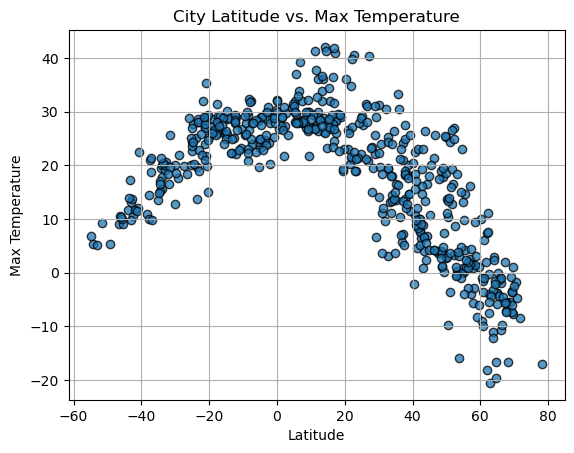

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

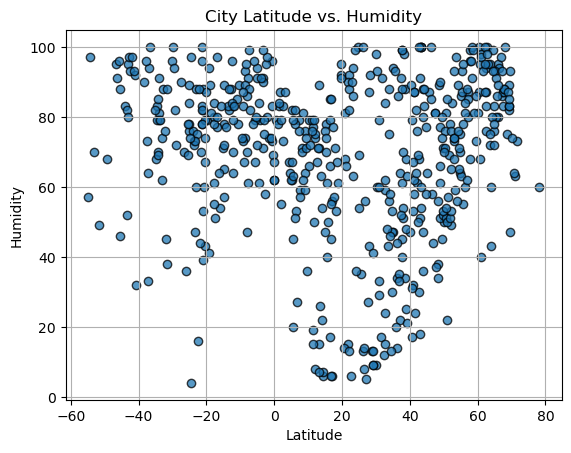

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

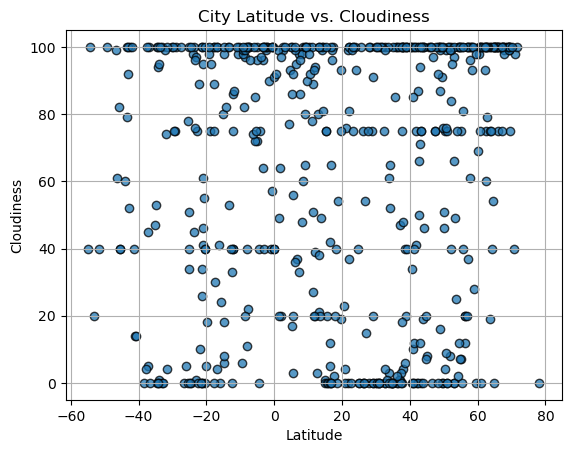

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

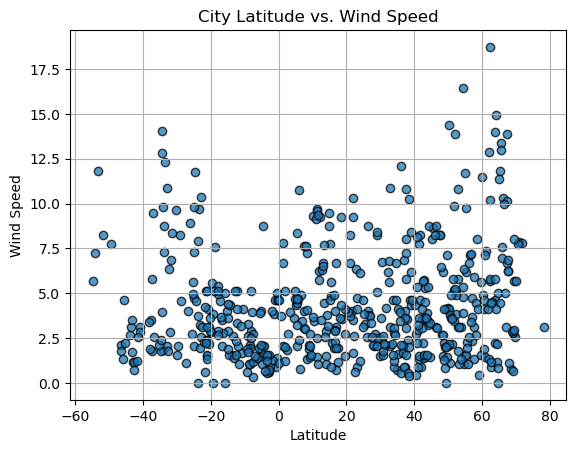

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    regression_line = slope * x + intercept
    
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, regression_line, color='red', label='Regression line')
    
    equation = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}'
    plt.text(0.05, 0.1, equation, fontsize=12, ha='left', va='bottom', color='red', transform=plt.gca().transAxes)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Show plot
    plt.show()
    return slope, intercept, rvalue, pvalue, stderr

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,georgetown,5.4112,100.3354,31.97,45,20,2.06,MY,1712498348
3,wailua homesteads,22.0669,-159.3780,21.24,92,100,10.29,US,1712498548
4,la ronge,55.1001,-105.2842,0.14,86,75,1.54,CA,1712498548
9,mu'minobod,38.1085,70.0285,18.35,51,4,2.38,TJ,1712498551
11,yellowknife,62.4560,-114.3525,-0.33,94,75,5.66,CA,1712498487


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,19.55,70,94,1.82,UY,1712498546
1,grytviken,-54.2811,-36.5092,5.41,97,100,7.22,GS,1712498357
5,waitangi,-43.9535,-176.5597,11.57,83,60,2.68,NZ,1712498549
6,papatowai,-46.5619,169.4708,9.11,95,99,2.14,NZ,1712498549
7,margaret river,-33.9500,115.0667,15.63,79,1,7.31,AU,1712498550


###  Temperature vs. Latitude Linear Regression Plot

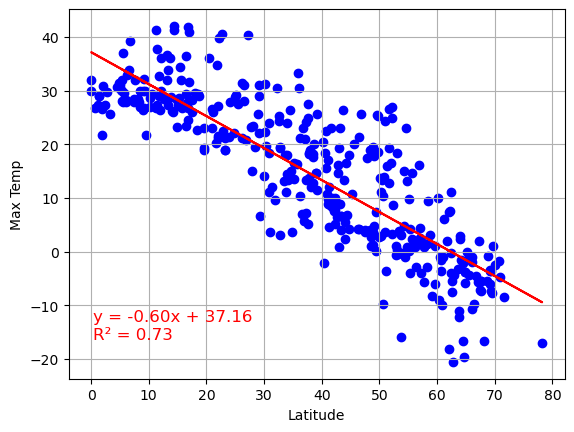

R-value: -0.8533107136733682


In [20]:
# Linear regression on Northern Hemisphere
x= northern_hemi_df['Lat']
y= northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Max Temp')
print("R-value:", rvalue)


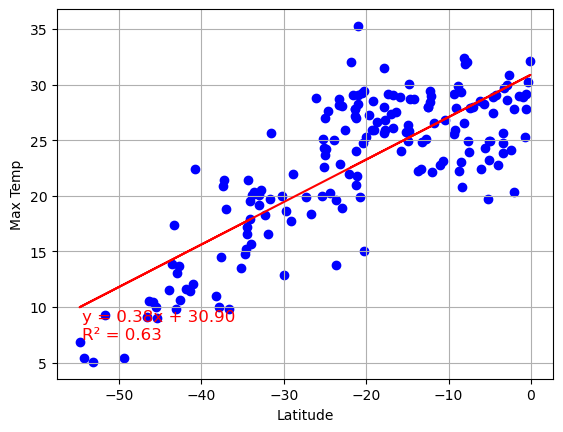

R-value: 0.793900916222345


In [21]:
# Linear regression on Southern Hemisphere
x= southern_hemi_df['Lat']
y= southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Max Temp')
print("R-value:", rvalue)


**Discussion about the linear relationship:** There seem to be more outliers in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

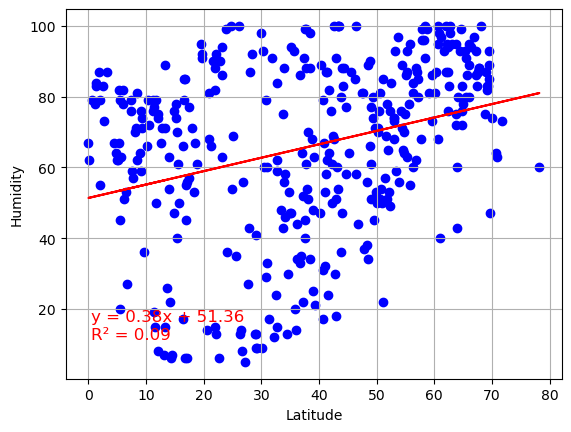

R-value: 0.3034210236696784


In [22]:
# Northern Hemisphere
x= northern_hemi_df['Lat']
y= northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Humidity')
print("R-value:", rvalue)

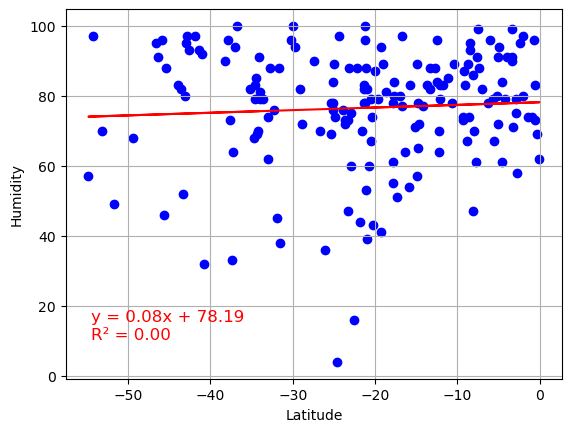

R-value: 0.06078627545152646


In [23]:
# Southern Hemisphere
x= southern_hemi_df['Lat']
y= southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Humidity')
print("R-value:", rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

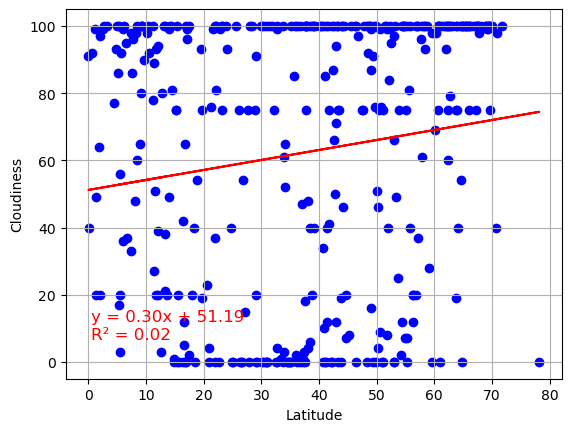

R-value: 0.1465958787542008


In [24]:
# Northern Hemisphere
x= northern_hemi_df['Lat']
y= northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Cloudiness')
print("R-value:", rvalue)

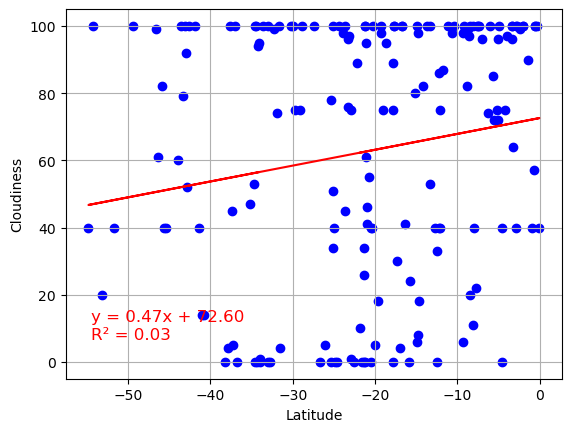

R-value: 0.16760675945003295


In [25]:
# Southern Hemisphere
x= southern_hemi_df['Lat']
y= southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Cloudiness')
print("R-value:", rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

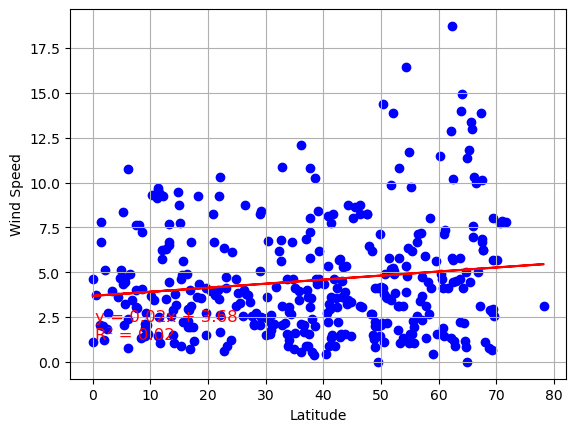

R-value: 0.14322233725768466


In [26]:
# Northern Hemisphere
x= northern_hemi_df['Lat']
y= northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Wind Speed')
print("R-value:", rvalue)

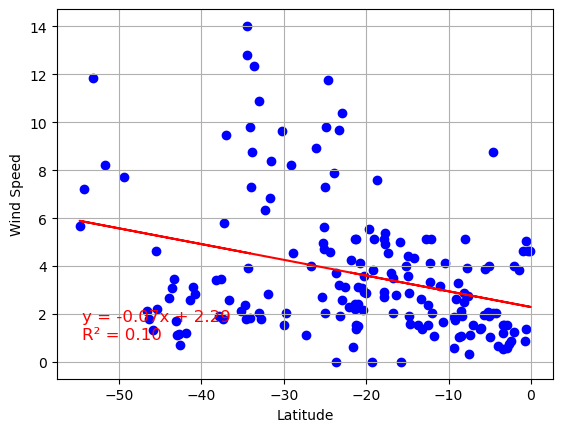

R-value: -0.31841465719834317


In [27]:
# Southern Hemisphere
x= southern_hemi_df['Lat']
y= southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = plot_linear_regression(x, y, xlabel='Latitude', ylabel='Wind Speed')
print("R-value:", rvalue)

**Discussion about the linear relationship:** YOUR RESPONSE HERE